In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_21488\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[1850]

Unnamed: 0                         1850.000000
EPIC ID                       220151612.000000
Teff                               4151.487000
logg                                  4.659200
Flare #                               5.000000
Observation time                     78.682583
Average flare duration                0.245180
Longest flare duration                0.817269
Shortest flare duration               0.081727
Average percentage increase        4046.138589
Highest percentage increase       20213.027954
Lowest percentage increase            1.208317
Name: 1850, dtype: float64

In [4]:
flc = from_mast("220151612", mode="LC", mission="K2")

9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
9% (342/3847) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

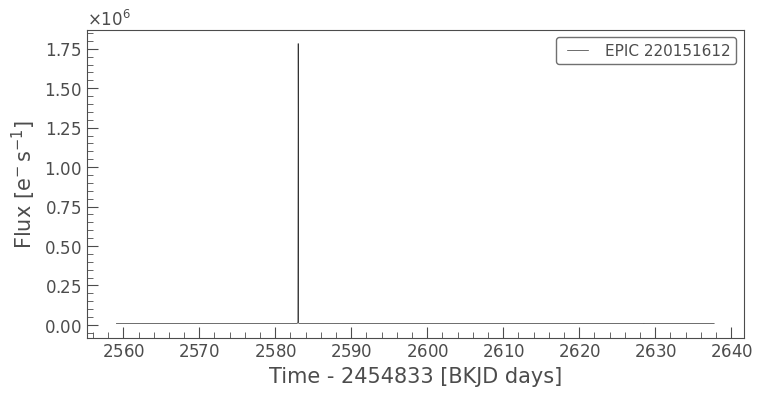

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

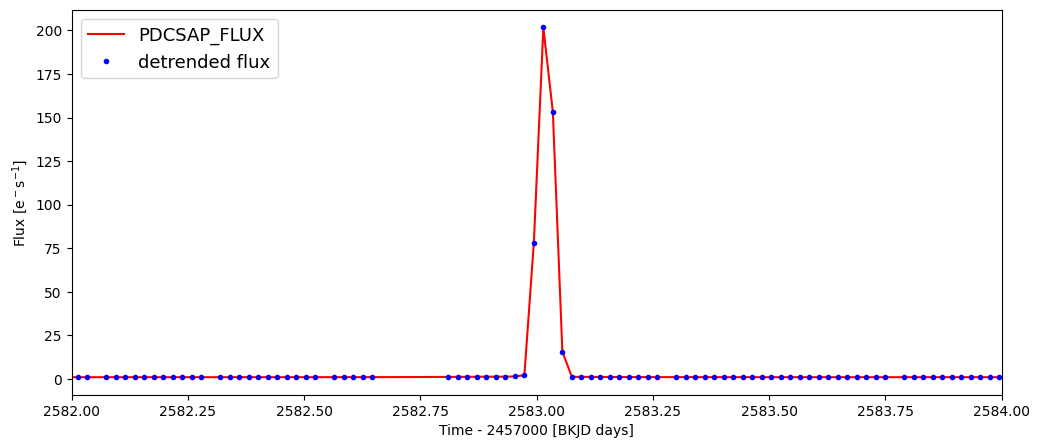

In [10]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2582, 2584)
#plt.ylim(.95,1.25)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,1063,1067,121057,121061,2582.565194,2582.646921,68.33904887244589,2.2903782311907284,0.012083172798156738,0.081727,3490.000000
1,1069,1108,121070,121110,2582.830806,2583.648076,798920.3954557647,11.641851661530593,202.13027954101562,0.817269,3490.000000
2,1356,1362,121429,121435,2590.165781,2590.288371,185.8286527747092,1.8646240913016592,0.06399405002593994,0.122590,3490.000000
3,2231,2235,122348,122354,2608.942392,2609.064982,64.99332655806191,2.346174054834413,0.017712712287902832,0.122589,3490.000000
4,3072,3076,123303,123307,2628.454559,2628.536285,166.86460258422377,1.4116269311158358,0.08285999298095703,0.081727,3490.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,69) gap.
Found 1 candidate(s) in the (69,1068) gap.
Found 1 candidate(s) in the (1068,1275) gap.
Found 2 candidate(s) in the (1275,2423) gap.
Found 0 candidate(s) in the (2423,2514) gap.
Found 0 candidate(s) in the (2514,2575) gap.
Found 1 candidate(s) in the (2575,3490) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
